In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [48]:
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
dataset.TotalCharges=pd.to_numeric(dataset.TotalCharges, errors='coerce')

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
pd.set_option('display.max_columns', None)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [81]:
dataset.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

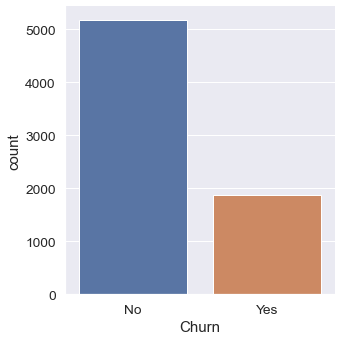

In [54]:
dataset['Churn'].value_counts()
sns.catplot(data=dataset, x="Churn", kind="count")

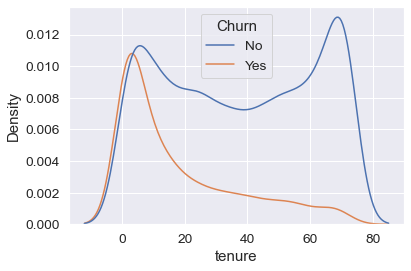

In [55]:
sns.kdeplot(data = dataset.dropna(),x='tenure',hue='Churn')
plt.show()

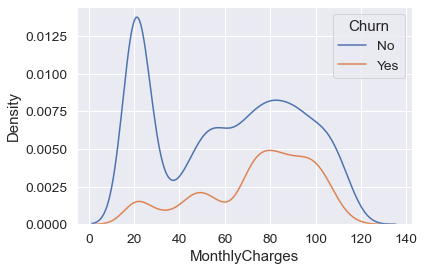

In [56]:
sns.kdeplot(data = dataset.dropna(),x='MonthlyCharges',hue='Churn')
plt.show()

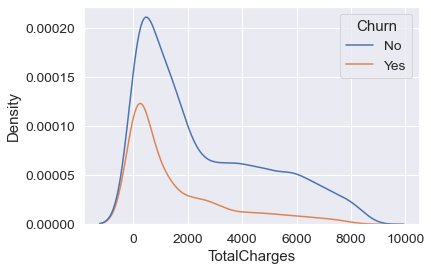

In [57]:
sns.kdeplot(data = dataset,x='TotalCharges',hue='Churn')
plt.show()

In [58]:
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype('str')

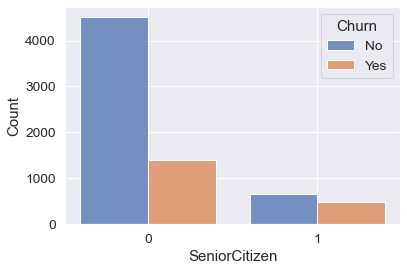

In [59]:
sns.histplot(data=dataset,x='SeniorCitizen',hue='Churn',multiple="dodge", shrink=0.8)
plt.show()

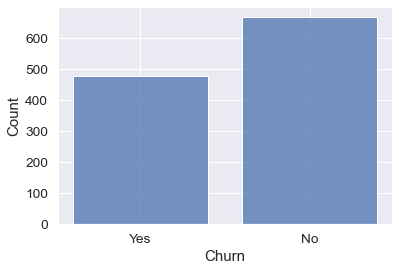

In [60]:
sns.histplot(data=dataset[dataset['SeniorCitizen'] == '1'],x='Churn',multiple="dodge", shrink=0.8,)
plt.show()

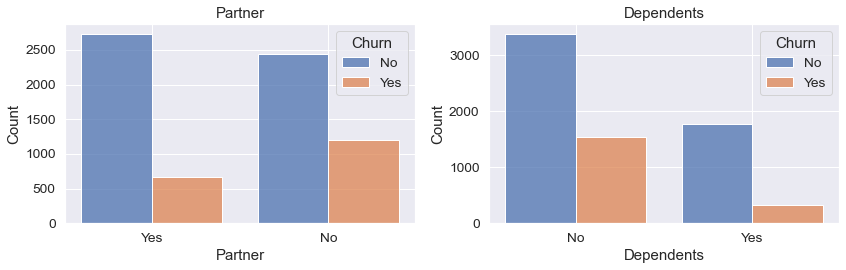

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=dataset,x='Partner',shrink=0.8,hue='Churn',multiple='dodge',ax=axes[0])
axes[0].set_title('Partner')
sns.histplot(data=dataset,x='Dependents',shrink=0.8,hue='Churn',multiple='dodge',ax=axes[1])
axes[1].set_title('Dependents')
plt.tight_layout()
plt.show()

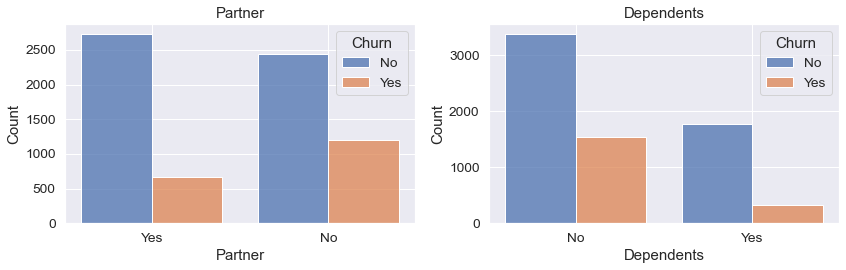

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=dataset,x='Partner',shrink=0.8,hue='Churn',multiple='dodge',ax=axes[0])
axes[0].set_title('Partner')
sns.histplot(data=dataset,x='Dependents',shrink=0.8,hue='Churn',multiple='dodge',ax=axes[1])
axes[1].set_title('Dependents')
plt.tight_layout()
plt.show()

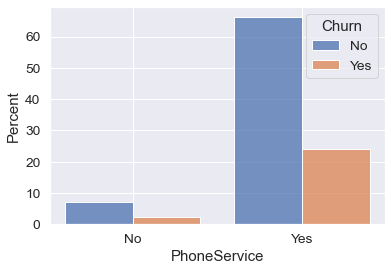

In [63]:
sns.histplot(data=dataset,x='PhoneService',shrink=0.8,hue='Churn',multiple='dodge',stat='percent')
plt.show()

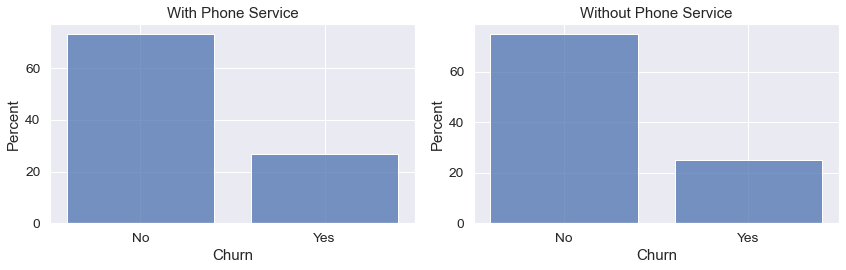

In [64]:
ig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=dataset[dataset['PhoneService'] == 'Yes'],x='Churn',stat='percent',shrink=0.8,ax=axes[0])
axes[0].set_title('With Phone Service')
sns.histplot(data=dataset[dataset['PhoneService'] == 'No'],x='Churn',stat='percent',shrink=0.8,ax=axes[1])
axes[1].set_title('Without Phone Service')
plt.tight_layout()
plt.show()

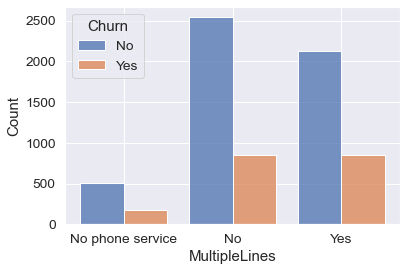

In [65]:
sns.histplot(data = dataset, x='MultipleLines',hue='Churn',shrink=0.8,multiple='dodge')
plt.show()

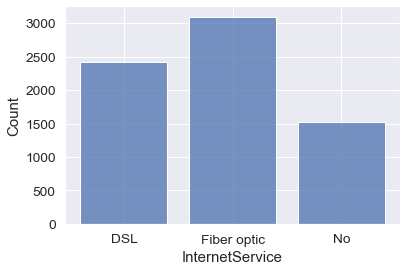

In [66]:
sns.histplot(data=dataset,x='InternetService',shrink=0.8)
plt.show()

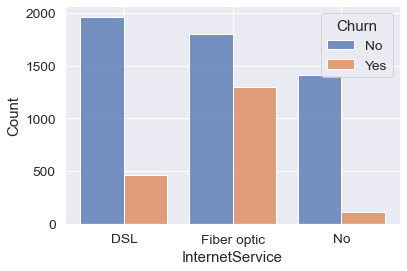

In [67]:
sns.histplot(data=dataset,x='InternetService',hue='Churn',multiple='dodge',shrink=0.8)
plt.show()

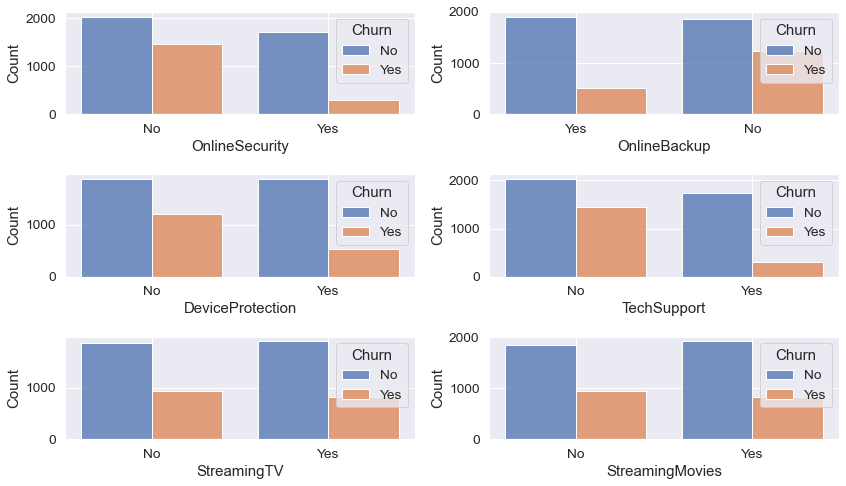

In [68]:
Internet_dataset = dataset[dataset['InternetService'] != 'No']
fig ,axes = plt.subplots(3,2, figsize=(12,7))
sns.histplot(data = Internet_dataset,x='OnlineSecurity',shrink=0.8,hue='Churn',multiple='dodge',ax=axes[0,0])
sns.histplot(data = Internet_dataset,x='OnlineBackup',shrink=0.8,hue='Churn',multiple='dodge',ax=axes[0,1])
sns.histplot(data = Internet_dataset,x='DeviceProtection',shrink=0.8,hue='Churn',multiple='dodge',ax=axes[1,0])
sns.histplot(data = Internet_dataset,x='TechSupport',shrink=0.8,hue='Churn',multiple='dodge',ax=axes[1,1])
sns.histplot(data = Internet_dataset,x='StreamingTV',shrink=0.8,hue='Churn',multiple='dodge',ax=axes[2,0])
sns.histplot(data = Internet_dataset,x='StreamingMovies',shrink=0.8,hue='Churn',multiple='dodge',ax=axes[2,1])
plt.tight_layout()
plt.show()

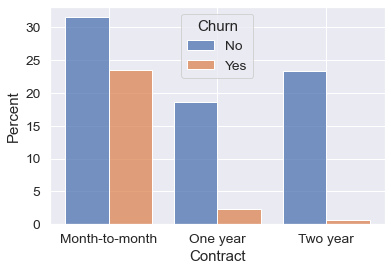

In [69]:
sns.histplot(data=dataset,x='Contract',hue='Churn',shrink=0.8,multiple='dodge',stat='percent')
plt.show()

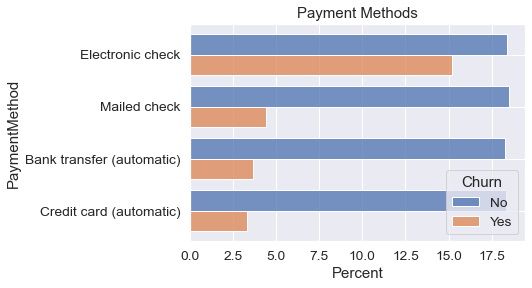

In [70]:
sns.histplot(data=dataset,y='PaymentMethod',hue='Churn',shrink=0.8,multiple='dodge',stat='percent').set_title('Payment Methods')
plt.show()

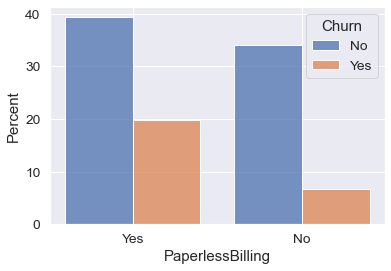

In [71]:
sns.histplot(data=dataset,x='PaperlessBilling',hue='Churn',shrink=0.8,multiple='dodge',stat='percent')
plt.show()

In [72]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
df = dataset
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [75]:
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [76]:
cols = ['gender','Partner','Dependents','PhoneService', 
        'MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport',
        'StreamingTV','StreamingMovies','Contract','TotalCharges',
        'PaperlessBilling','PaymentMethod']
ord = OrdinalEncoder()
ord.fit(df[cols])
df[cols] = ord.transform(df[cols])
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,74.0,No
1,5575-GNVDE,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,3624.0,No
2,3668-QPYBK,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,536.0,Yes
3,7795-CFOCW,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,3570.0,No
4,9237-HQITU,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,674.0,Yes
5,9305-CDSKC,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,2173.0,Yes
6,1452-KIOVK,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,3673.0,No
7,6713-OKOMC,0.0,0,0.0,0.0,10,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.75,1145.0,No
8,7892-POOKP,0.0,0,1.0,0.0,28,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,104.80,4385.0,Yes
9,6388-TABGU,1.0,0,0.0,1.0,62,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.15,4632.0,No


In [77]:
Churn_ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)
Churn_dummies = Churn_ohe.fit_transform(df[['Churn']])
df.drop(columns=['Churn'],inplace=True)

In [78]:
df = pd.concat([df, pd.DataFrame(Churn_dummies)], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,0
0,7590-VHVEG,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,74.0,0
1,5575-GNVDE,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,3624.0,0
2,3668-QPYBK,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,536.0,1
3,7795-CFOCW,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,3570.0,0
4,9237-HQITU,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,674.0,1


In [79]:
df.rename(columns={0:"Churn"}, inplace=True)

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,74.0,0
1,5575-GNVDE,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,3624.0,0
2,3668-QPYBK,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,536.0,1
3,7795-CFOCW,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,3570.0,0
4,9237-HQITU,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,674.0,1


In [36]:
df.drop(columns =['customerID'], axis=1, inplace=True)
df.head().T

,0,1,2,3,4
gender,0.0,1.0,1.0,1.0,0.0
SeniorCitizen,0,0,0,0,0
Partner,1.0,0.0,0.0,0.0,0.0
Dependents,0.0,0.0,0.0,0.0,0.0
tenure,1,34,2,45,2
PhoneService,0.0,1.0,1.0,0.0,1.0
MultipleLines,1.0,0.0,0.0,1.0,0.0
InternetService,0.0,0.0,0.0,0.0,1.0
OnlineSecurity,0.0,2.0,2.0,2.0,0.0
OnlineBackup,2.0,0.0,2.0,0.0,0.0


In [37]:
df.to_csv('cleaned_Dataset.csv',index=None)

In [38]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=1)
print('X_train:',len(X_train))
print('X_test:',len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

X_train: 4930
X_test: 2113
y_train 4930
y_test 2113


In [39]:
corrmat = df.corr()

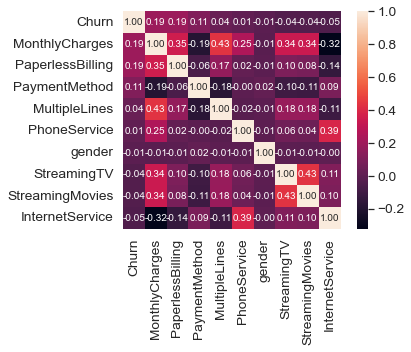

In [40]:
k = 10 
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [41]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [42]:
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [43]:
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train, y_train)  # training of data
y_pred = model.predict(X_test)  # Prediction for Test cases
accuracy = model.score(X_test,y_test)  # accuracy of Prediction
print("Logistic Regression accuracy: ",accuracy)

Logistic Regression accuracy:  0.8106956933270232


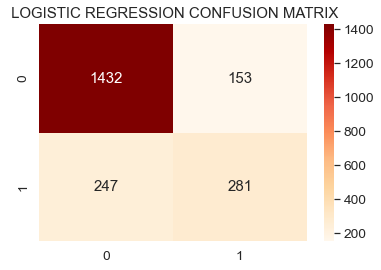

In [44]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d",cmap='OrRd')
plt.title(" LOGISTIC REGRESSION CONFUSION MATRIX")
plt.show()

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1585
           1       0.65      0.53      0.58       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113

